In [1]:
# STEP 1.1

# !git clone https://github.com/sorki/python-mnist
# !./python-mnist/bin/mnist_get_data.sh
# !pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

Imported the EMNIST libraries we need!


In [2]:
# Grab the data from the OpenML website
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# There is one other thing we need to do, we need to
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


Image Label: l


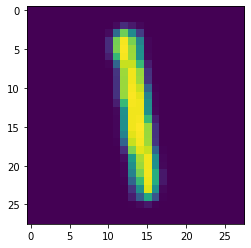

In [3]:
import matplotlib.pyplot as plt

img_index = 57 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

In [4]:
# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


In [5]:
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732


/home/diptesh/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.886500
Test set score: 0.840800


[[330   6   0   7   0   4   4   3   0   1   3   0   5   5   2   5   5   2
    0   0   4   0   0   1   0   4]
 [  3 338   1  10   1   0   4  16   0   0   2   3   1   0   1   3   1   4
    1   0   0   0   2   1   0   2]
 [  4   0 334   0   9   1   3   1   1   0   2   9   1   1   2   2   1   3
    0   0   2   0   0   0   0   1]
 [  7  11   0 338   1   0   2   0   1   5   0   0   0   4  11   4   1   0
    2   2   2   1   1   2   0   1]
 [  7   3  22   2 327   8   1   0   0   0   3   1   1   0   0   0   0   6
    2   3   1   0   0   0   0   7]
 [  2   3   0   0   3 342   1   0   0   1   0   0   0   0   0  18   0   2
    0   3   0   0   0   0   0   1]
 [ 19   8   6   3   8   3 250   0   0   2   0   0   1   0   2   4  40   5
   13   1   2   0   1   0   5   3]
 [  7   7   0   2   0   0   1 318   2   1   2   5  10  17   0   1   0   1
    0   1   3   0   2   1   1   0]
 [  0   0   0   4   0   4   0   0 311   3   0  84   0   0   0   1   1   2
    1   2   0   0   0   0   0   4]
 [  0   1   1  11  

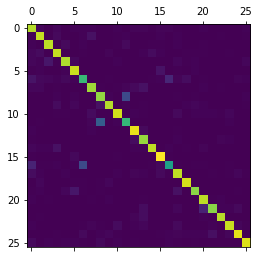

In [6]:
# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)
print(cm)

## Trying SVM Linear Kernel

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_test)

In [ ]:
# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred), average=None)

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred), average=None)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)

## Trying SVM Polynomial

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly') # Polynomial Kernel
clf.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_test)

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred), average='weighted')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred), average='weighted')

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

## Trying SVM Radial

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf') # Polynomial Kernel
clf.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_test)

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred), average='weighted')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred), average='weighted')

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

## Trying Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'lbfgs')
clf.fit(X_train, y_train)

/home/diptesh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred = clf.predict(X_test)

Accuracy: 0.712


In [11]:
# # Model Precision: what percentage of positive tuples are labeled as such?
# print("Precision:",metrics.precision_score(y_test, y_pred), average='weighted')

# # Model Recall: what percentage of positive tuples are labelled as such?
# print("Recall:",metrics.recall_score(y_test, y_pred), average='weighted')

[[215   3   0  19   8   6  11  20   0   1   9   1   8  18  16   9  18   3
    0   1  10   0   3   2   2   8]
 [  6 277   2  24   6   0  15  19   4   4   4   3   2   0   4   0   4   1
    3   2   2   1   1   3   2   5]
 [  6   0 306   1  17   0   5   0   0   1   8   7   0   0   5   2   4   4
    4   3   2   0   1   1   0   0]
 [  4  24   0 274   2   0   4  12   2  10   3   7   0   1  24   4   7   0
    2   0   7   3   3   0   1   2]
 [  6   4  26   1 295   3   5   2   0   0  11   2   0   6   2   0   3  11
    6   8   0   0   0   1   0   2]
 [  0   0   2   0   4 289   3   1   0   3   0   1   2   0   0  26   7  12
    2  14   0   0   0   1   7   2]
 [ 12  14  14   1   3   6 183   1   0  18   0   0   0   1   3   7  51   2
   26  13   4   0   5   1  11   0]
 [  7   6   0   6   1   2   4 262   8   7  13  13   7  17   0   2   0   0
    0   1   6   6   4   8   2   0]
 [  0   1   0   2   0   2   3   1 241  11   2 107   0   1   0   0   5   2
    3   8   0   4   0  15   2   7]
 [  1   1   4  16  

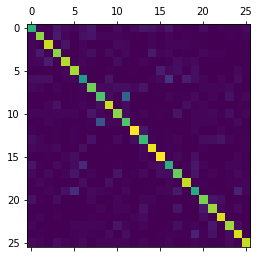

In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)

## Back to MLP

[[330   6   0   7   0   4   4   3   0   1   3   0   5   5   2   5   5   2
    0   0   4   0   0   1   0   4]
 [  3 338   1  10   1   0   4  16   0   0   2   3   1   0   1   3   1   4
    1   0   0   0   2   1   0   2]
 [  4   0 334   0   9   1   3   1   1   0   2   9   1   1   2   2   1   3
    0   0   2   0   0   0   0   1]
 [  7  11   0 338   1   0   2   0   1   5   0   0   0   4  11   4   1   0
    2   2   2   1   1   2   0   1]
 [  7   3  22   2 327   8   1   0   0   0   3   1   1   0   0   0   0   6
    2   3   1   0   0   0   0   7]
 [  2   3   0   0   3 342   1   0   0   1   0   0   0   0   0  18   0   2
    0   3   0   0   0   0   0   1]
 [ 19   8   6   3   8   3 250   0   0   2   0   0   1   0   2   4  40   5
   13   1   2   0   1   0   5   3]
 [  7   7   0   2   0   0   1 318   2   1   2   5  10  17   0   1   0   1
    0   1   3   0   2   1   1   0]
 [  0   0   0   4   0   4   0   0 311   3   0  84   0   0   0   1   1   2
    1   2   0   0   0   0   0   4]
 [  0   1   1  11  

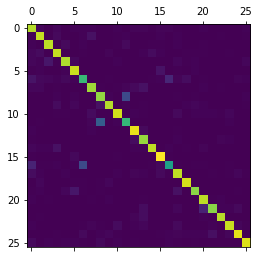

In [13]:
y_pred = mlp1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)

There were 37 times that the letter v was predicted to be the letter u.


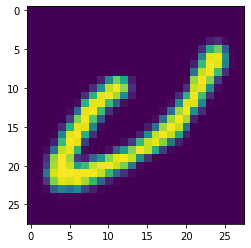

In [14]:
# You can change this to any letters that you think the neural network may have confused...
predicted_letter = 'u'
actual_letter = 'v'

# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

In [15]:
# Change some of the values in the below statement and re-run to see how they 
# affect performance!
mlp2 = MLPClassifier(hidden_layer_sizes=(50,30,), max_iter=40, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.06429486
Iteration 2, loss = 0.61560892
Iteration 3, loss = 0.53620608
Iteration 4, loss = 0.49365112
Iteration 5, loss = 0.46830123
Iteration 6, loss = 0.44538334
Iteration 7, loss = 0.42852649
Iteration 8, loss = 0.41820114
Iteration 9, loss = 0.40089229
Iteration 10, loss = 0.39670897
Iteration 11, loss = 0.38727373
Iteration 12, loss = 0.37837569
Iteration 13, loss = 0.37140595
Iteration 14, loss = 0.36003681
Iteration 15, loss = 0.36351089
Iteration 16, loss = 0.35376022
Iteration 17, loss = 0.35241392
Iteration 18, loss = 0.34531980
Iteration 19, loss = 0.34546771
Iteration 20, loss = 0.33945247
Iteration 21, loss = 0.33057164
Iteration 22, loss = 0.32759774
Iteration 23, loss = 0.33102812
Iteration 24, loss = 0.32382911
Iteration 25, loss = 0.32223391
Iteration 26, loss = 0.31937297
Iteration 27, loss = 0.31911277
Iteration 28, loss = 0.31349517
Iteration 29, loss = 0.31039403
Iteration 30, loss = 0.31498092
Iteration 31, loss = 0.31351284
Iteration 32, los

/home/diptesh/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.910483
Test set score: 0.856900


In [16]:
y_pred = mlp2.predict(X_test)

[[317   6   0   4   2   1   4   8   0   0   2   0   1  13   5   0   3   6
    0   0   6   0   2   2   1   8]
 [  8 324   1   7   6   0   5  19   0   1   1   4   2   1   2   2   0   3
    2   1   1   0   1   0   0   3]
 [ 10   1 330   0  11   0   0   1   0   0   5   4   2   1   2   1   3   5
    0   1   0   0   0   0   0   0]
 [  5   4   0 347   1   0   5   1   0   1   1   2   2   6  15   2   0   0
    0   0   2   0   0   0   1   1]
 [ 11   2  13   0 343   3   1   0   0   0   5   1   0   0   1   1   3   1
    1   2   1   0   1   0   0   4]
 [  1   0   0   2   4 341   2   0   0   0   0   1   0   0   1   9   4   5
    0   3   0   1   0   0   0   2]
 [ 22   9   2   0   0   4 250   0   0   2   0   2   2   0   1   1  68   1
    4   0   1   0   0   1   6   0]
 [  1   6   0   1   0   1   1 336   0   0  12   1   4  14   0   2   0   0
    0   1   0   0   0   0   2   0]
 [  1   1   1   1   0   2   0   0 302  10   1  76   0   0   0   0   1   0
    1   2   1   0   0   2   0  15]
 [  5   3   0   3  

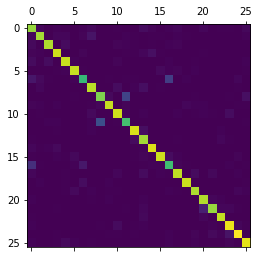

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)

In [18]:
# STEP 4.1

# Pulls the scanned data set from GitHub
# !git clone https://github.com/crash-course-ai/lab1-neural-networks.git
# !git pull
!ls lab1-neural-networks/letters_mod
!cd lab1-neural-networks/letters_mod
!pwd

# Puts all the data in the "files" variable
import os
path, dirs, files = next(os.walk("lab1-neural-networks/letters_mod/"))
files.sort()

00.jpg	10.jpg	20.jpg	30.jpg	40.jpg	50.jpg	60.jpg	70.jpg	80.jpg	90.jpg
01.jpg	11.jpg	21.jpg	31.jpg	41.jpg	51.jpg	61.jpg	71.jpg	81.jpg	91.jpg
02.jpg	12.jpg	22.jpg	32.jpg	42.jpg	52.jpg	62.jpg	72.jpg	82.jpg	92.jpg
03.jpg	13.jpg	23.jpg	33.jpg	43.jpg	53.jpg	63.jpg	73.jpg	83.jpg	93.jpg
04.jpg	14.jpg	24.jpg	34.jpg	44.jpg	54.jpg	64.jpg	74.jpg	84.jpg	94.jpg
05.jpg	15.jpg	25.jpg	35.jpg	45.jpg	55.jpg	65.jpg	75.jpg	85.jpg	95.jpg
06.jpg	16.jpg	26.jpg	36.jpg	46.jpg	56.jpg	66.jpg	76.jpg	86.jpg	96.jpg
07.jpg	17.jpg	27.jpg	37.jpg	47.jpg	57.jpg	67.jpg	77.jpg	87.jpg	97.jpg
08.jpg	18.jpg	28.jpg	38.jpg	48.jpg	58.jpg	68.jpg	78.jpg	88.jpg	98.jpg
09.jpg	19.jpg	29.jpg	39.jpg	49.jpg	59.jpg	69.jpg	79.jpg	89.jpg	99.jpg
/home/diptesh/workspace/MNIST


Imported the scanned images.


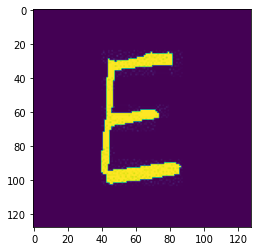

In [23]:
# These libraries let us import the letters, resize them, and print them out
import cv2
import matplotlib.pyplot as plt

# This code processes all the scanned images and adds them to the handwritten_story
handwritten_story = []
for i in range(len(files)):
  img = cv2.imread("lab1-neural-networks/letters_mod/"+files[i],cv2.IMREAD_GRAYSCALE)
  handwritten_story.append(img)

print("Imported the scanned images.")

plt.imshow(handwritten_story[2])  #<--- Change this index to see different letters

In [24]:
# These are libraries we need to do some math on the image
# to be able to give it to the MLP in the right format and to resize it to 28x28 pixels
import numpy
import cv2

typed_story = ""
for letter in handwritten_story:
    letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
taejfxoltjznjcuxjzawerjsnpeccesjejreeedenjlgyejthejwxrjrguajextteayjdcesjskowzrjxndjzlenjxlljxtjoxce


In [25]:
# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in handwritten_story:
  letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
tae fxolt zn cux zawer snpecces e reee en lgye the wxr rgua extteay dces skowzr xnd zlen xll xt oxce


Processed the scanned images.


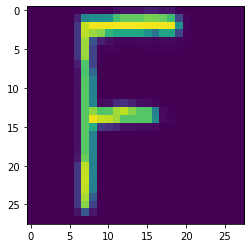

In [26]:
# These steps process the scanned images to be in the same format and have the same properties as the EMNIST images
# They are described by the EMNIST authors in detail here: https://arxiv.org/abs/1702.05373v1
processed_story = []

for img in handwritten_story:
  #step 1: Apply Gaussian blur filter
  img = cv2.GaussianBlur(img, (7,7), 0)
  
  #steps 2 and 3: Extract the Region of Interest in the image and center in square
  points = cv2.findNonZero(img)
  x, y, w, h = cv2.boundingRect(points)
  if (w > 0 and h > 0):
    if w > h:
      y = y - (w-h)//2
      img = img[y:y+w, x:x+w]
    else:
      x = x - (h-w)//2
      img = img[y:y+h, x:x+h]
     
  #step 4: Resize and resample to be 28 x 28 pixels
  img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
  
  #step 5: Normalize pixels and reshape before adding to the new story array
  img = img/255
  img = img.reshape((28,28))
  processed_story.append(img)

print("Processed the scanned images.")

import matplotlib.pyplot as plt
plt.imshow(processed_story[4]) #<<< change this index if you want to see a different letter from the story

In [30]:
# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in processed_story:
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
the faulf qn our power supplqbs i fell in love the way your battery dgzs slawly and fhen all af ance
